###  G08 : Óscar Morujo Fernández, Gorka Silva Ramón

# PARTE 3: REGRESIÓN

## Preparando los datos:

Conjunto de datos countries.csv


Cada elemento del conjunto de datos es un país descrito por una serie de características sociales, económicas, geográficas y demográficas. La variable a predecir es el PIB del país (GDP en inglés de Gross Domestic Product). 

In [28]:
import pandas as pd

df = pd.read_csv ('Datos/countries.csv')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [29]:
df = df.drop(['Region'], axis=1)
df = df.dropna(axis = 0)
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [30]:
print(df.isnull().sum())

Country                               0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP (USD per capita)                  0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [39]:
#Tipos de las variables
df.dtypes

Country                                object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP (USD per capita)                  float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

Nos interesa analizar la relacion de GDP con las demás variables:
Representamos mediante matrices de dispersión las variables,mediante el cual podemos ver como el valor más frecuente esta entre 0 y 5000. Podemos ver con los percentiles que el 75% es menor que 5100.
Además  la media es 9125.69 , el 75% es menor que 12950 y el maximo es 37800, lo que nos dice que tenemos la mayoría de los puntos acumulados en una misma zona pero con valores extremos(el max y el min que es muy pequeño y muy grande respectivamente).

Si nos fijamos en el grafico de dispersión de abajo vemos que variables como population,area,pop density, coastline, agriculture y literacy tienden a tener los puntos menos dispersos que las demás variables

In [43]:
df['GDP (USD per capita)'].describe()

count      179.000000
mean      9125.698324
std       9644.123141
min        500.000000
25%       1800.000000
50%       5100.000000
75%      12950.000000
max      37800.000000
Name: GDP (USD per capita), dtype: float64

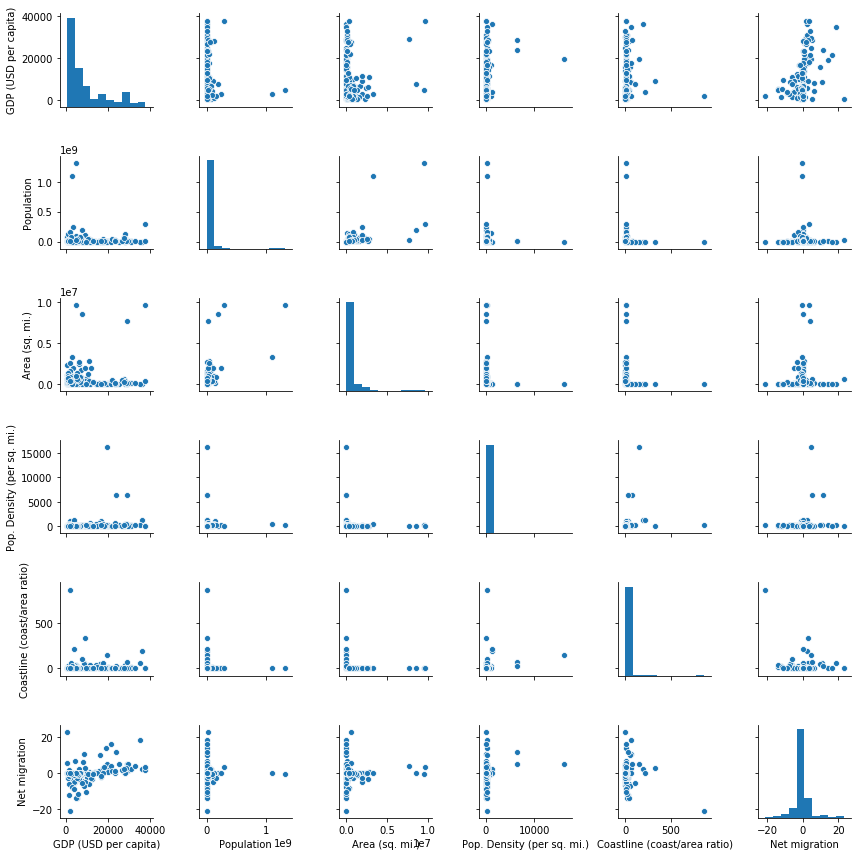

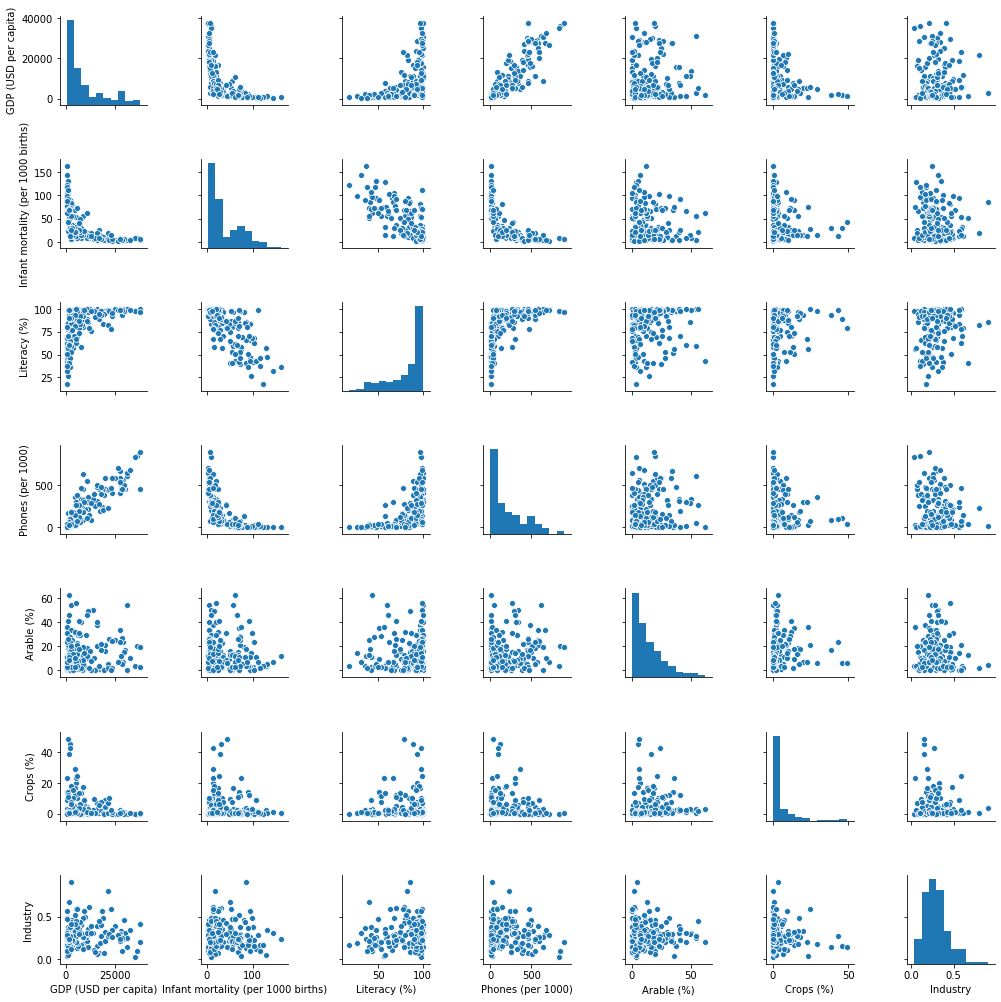

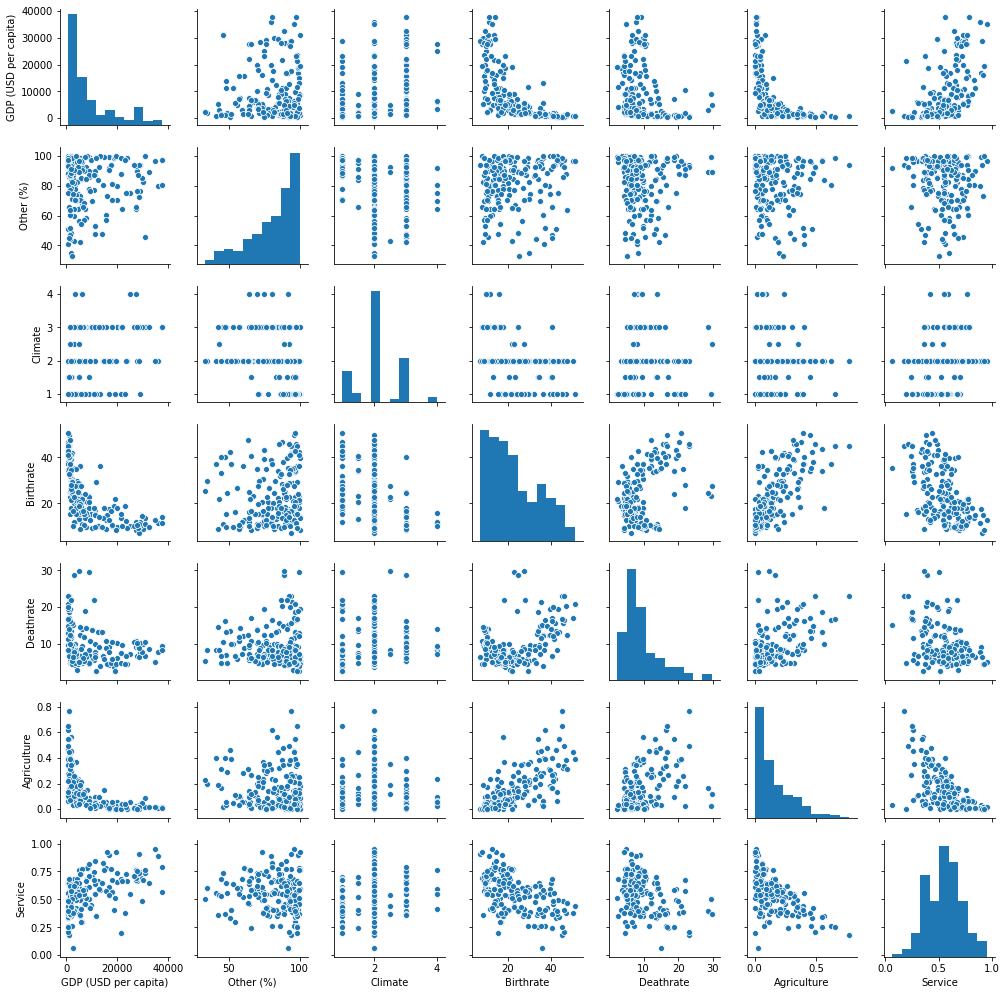

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(df,vars= ['GDP (USD per capita)','Population','Area (sq. mi.)',
                      'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)',
                      'Net migration'],height=2)
sns.pairplot(df,vars= ['GDP (USD per capita)','Infant mortality (per 1000 births)','Literacy (%)',
                      'Phones (per 1000)','Arable (%)',
                      'Crops (%)','Industry'],height=2)
sns.pairplot(df,vars= ['GDP (USD per capita)','Other (%)','Climate',
                      'Birthrate','Deathrate',
                      'Agriculture','Service'],height=2)

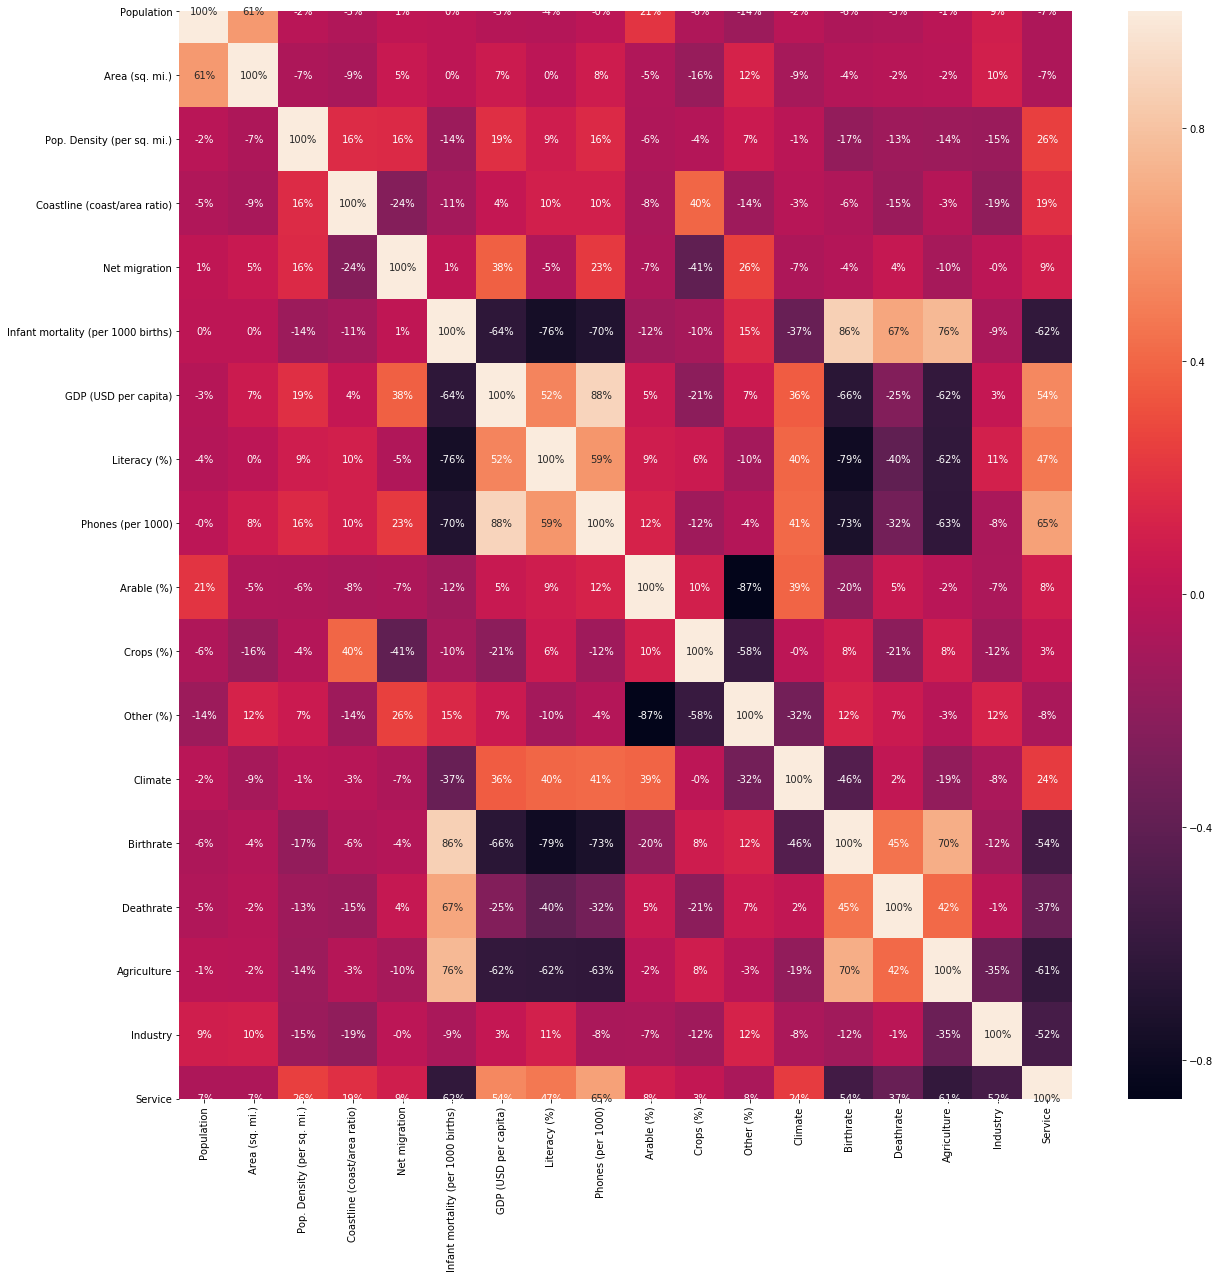

In [33]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [6]:
correl=df.corr()
correl['GDP (USD per capita)']

Population                           -0.033618
Area (sq. mi.)                        0.068356
Pop. Density (per sq. mi.)            0.190122
Coastline (coast/area ratio)          0.035815
Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Arable (%)                            0.046465
Crops (%)                            -0.207844
Other (%)                             0.066445
Climate                               0.360567
Birthrate                            -0.658795
Deathrate                            -0.247562
Agriculture                          -0.616919
Industry                              0.032855
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Principalmente es inversamente lineal a los valores de agricultura, mortalidad infantil y a la tasa de natalidad (< -0,60). Estas dos últimas variables hay una relación directa (> 0,85). Por eso no podemos atribuir el hecho de tener una natalidad baja y por lo tanto una mayor edad media de la población a tener mayor PIB. Respecto a la agricultura se puede observar que los paises con mayor PIB tienen menor agricultura porque no es una actividad que produzca mucho capital. Sin embargo vemos un valor menos inversamente lineal en el número de cultivos. Esto se puede suponer porque existen países como EE. UU. que tienen una superficie grande de cultivos aunque la agriicultura no representa una parte significativa de la producción de capital.


El mayor valor con el que está relacionado linealmente es la cantidad te teléfonos moviles (0,88). Los siguientes valores con los que está relacionado son servicios y alfabetismo. Supongo que hay esa relación con los servicios porque los países más desarrollados tienen más personas con edad entre 70 y 100 años y porque tienen también bastante turismo. El alfabetismo está solo en 0,52. De aquí se puede pensar que en teoría un país con mayor PIB tendría que tener menos gente analfabeta porque tiene más recursos. Pero al observar una relación relativamente baja se podría pensar que no es tan necesario que la gente deje de ser analfabeta para tener mayor PIB. Suponiendo sólo la gente con muy pocos recursos es analfabeta entonces podemos indicar que hay un reparto de la riqueza en el cual los que tienen dinero tienen mucho dinero y los que no tienen no tienen casi nada.

Eliminamos las variables que tienen menor de 0,1 de relación con el PIB

In [7]:
df = df.drop(['Area (sq. mi.)'], axis=1)
df = df.drop(['Coastline (coast/area ratio)'], axis=1)
df = df.drop(['Other (%)'], axis=1)
df = df.drop(['Arable (%)'], axis=1)
df = df.drop(['Industry'], axis=1)
df = df.drop(['Population'], axis=1)
dfaux = df

In [8]:
#Resultados para la parte 3. MLP1
d1 = df.loc[df['Phones (per 1000)'] == 3.2]
d2 = df.loc[df['Phones (per 1000)'] == 33.5]
d3 = df.loc[df['Deathrate'] == 9.60]
d4 = df.loc[df['Phones (per 1000)'] == 23.7]
d5 = df.loc[df['Phones (per 1000)'] == 31.8]

frames = [d1, d2, d3, d4, d5]
dfNeg1 = pd.concat(frames)


d1 = df.loc[df['Phones (per 1000)'] == 3.7]
d2 = df.loc[df['GDP (USD per capita)'] == 2700]
d3 = df.loc[df['Deathrate'] == 19.93]
d4 = df.loc[df['Phones (per 1000)'] == 9.3]

frames = [d1, d2, d3, d4]
dfPos1 = pd.concat(frames)

#MLP2
d1 = df.loc[df['Infant mortality (per 1000 births)'] == 121.69]
d2 = df.loc[df['Infant mortality (per 1000 births)'] == 43.11]
d3 = df.loc[df['Infant mortality (per 1000 births)'] == 116.70]
d4 = df.loc[df['GDP (USD per capita)'] == 2000]

frames = [d1, d2, d3, d4]
dfNeg2 = pd.concat(frames)


d1 = df.loc[df['Phones (per 1000)'] == 3.2]
d2 = df.loc[df['GDP (USD per capita)'] == 4300]
d3 = df.loc[df['Infant mortality (per 1000 births)'] == 47.77]
d4 = df.loc[df['Infant mortality (per 1000 births)'] == 50.25]
d5 = df.loc[df['Infant mortality (per 1000 births)'] == 24.04]

frames = [d1, d2, d3, d4, d5]
dfPos2 = pd.concat(frames)


Aquí podríamos no reescalar las variables. Pero haciendo un reescalado hacemos que los pesos de las variables se equilibren y por lo tanto puede mejorar el aprendizaje y el tiempo en el que se realiza.

In [9]:
import numpy as np
df = df.drop(['Country'], axis=1)
df = df.apply(pd.to_numeric) 
X = df.to_numpy()

In [10]:
from sklearn.preprocessing import StandardScaler
#Tenemos que quitar la variable PIB
dfaux1 = df.drop(['GDP (USD per capita)'], axis=1)
dforiginal = df.to_numpy()
Y = dforiginal[:,3] # variable target
X = dfaux1.to_numpy()
# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(X)
paises_scaled=scaler_x.transform(X)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(Y.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
gdp_scaled=scaler_y.transform(Y.reshape(-1, 1))

### Validación cruzada y perceptrones multicapa

##### 1. MLP1. Una capa de 200 neuronas.

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, paises_scaled, gdp_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    

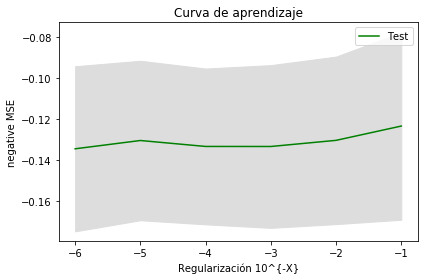

In [12]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Análisis del error:

In [17]:
from sklearn.model_selection import cross_val_predict


regul_param=10**-2

mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=333)
    

predicts_scaled = cross_val_predict(mlp, paises_scaled, gdp_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)


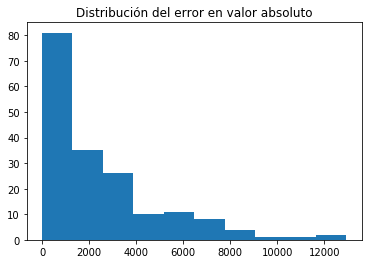

In [18]:
# Dibujamos el histograma de los errores

fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(Y - predicts))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

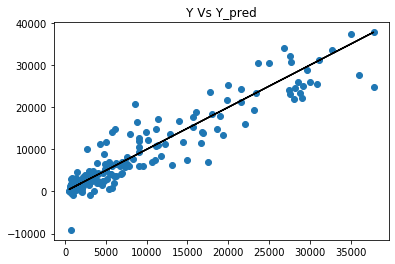

In [19]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(Y, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(Y, Y, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

In [20]:
import numpy as np
import pandas as pd

# Creación a partir de un diccionario
valores = {'Nombres': dfaux['Country'],
        'Y': Y,
        'Y_predict': predicts}

# Si no se especifican las columnas se usan todas
df1 = pd.DataFrame(valores, columns=['Nombres','Y', 'Y_predict'])
df1['Error%'] = abs(((df1['Y_predict']*100) /  df1['Y'])-100)

In [21]:
df1.sort_values(by='Error%').tail(10)

,Nombres,Y,Y_predict,Error%
105,Jordan,4300.0,11165.191750,159.655622
107,Kenya,1000.0,2601.680547,160.168055
199,Tajikistan,1000.0,-852.796879,185.279688
224,Yemen,800.0,2425.193275,203.149159
97,Iraq,1500.0,4653.615471,210.241031
152,Nigeria,900.0,3095.827040,243.980782
225,Zambia,800.0,2773.385549,246.673194
62,Equatorial Guinea,2700.0,10199.250154,277.750006
46,Congo. Repub. of the,700.0,3022.169420,331.738489
0,Afghanistan,700.0,-9128.295091,1404.042156


In [22]:
df1.sort_values(by='Error%').head(10)

,Nombres,Y,Y_predict,Error%
96,Iran,7000.0,7001.403259,0.020047
214,United States,37800.0,37740.757114,0.156727
54,Denmark,31100.0,31192.556629,0.297610
198,Taiwan,23400.0,23310.376405,0.383007
202,Togo,1500.0,1508.512685,0.567512
192,Sudan,1900.0,1880.870689,1.006806
81,Grenada,5000.0,5070.305564,1.406111
149,New Zealand,21600.0,21261.829463,1.565604
164,Portugal,18000.0,18284.407178,1.580040
17,Barbados,15700.0,15413.520571,1.824710


In [23]:
(df1['Error%'] < 20.0).value_counts()

False    110
True      69
Name: Error%, dtype: int64

In [24]:
(df1['Error%'] > 100.0).value_counts()

False    157
True      22
Name: Error%, dtype: int64

In [25]:
dfNeg1 # Mayor error cometido subestimando el GDP

,Country,Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Service
0,Afghanistan,48.0,23.06,163.07,700.0,36.0,3.2,0.22,1.0,46.60,20.34,0.380,0.380
199,Tajikistan,51.2,-2.86,110.76,1000.0,99.4,33.5,0.92,2.0,32.65,8.25,0.234,0.480
63,Eritrea,39.5,0.00,74.87,700.0,58.6,7.9,0.03,1.5,34.33,9.60,0.102,0.643
116,Lesotho,66.6,-0.74,84.23,3000.0,84.8,23.7,0.13,3.0,24.75,28.71,0.163,0.394
156,Pakistan,206.2,-2.77,72.44,2100.0,45.7,31.8,0.87,1.0,29.74,8.23,0.216,0.533


In [23]:
dfPos1 # Mayor error cometido sobreestimando el GDP

,Country,Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Service
46,Congo. Repub. of the,10.8,-0.17,93.86,700.0,83.8,3.7,0.13,2.0,42.57,12.93,0.062,0.369
62,Equatorial Guinea,19.3,0.00,85.13,2700.0,85.7,18.5,3.57,2.0,35.59,15.06,0.030,0.062
225,Zambia,15.3,0.00,88.29,800.0,80.6,8.2,0.03,2.0,41.00,19.93,0.220,0.489
152,Nigeria,142.7,0.26,98.80,900.0,68.0,9.3,2.96,1.5,40.43,16.94,0.269,0.244


#### Conclusiones MLP1
Se comete mucho error. Sólo 69 de 179 tiene un error menor al 20% de su valor, ya se por abajo o por arriba. Es verdad que hay muchos valores en los que el error no supera el 10% pero hay demasiadas predicciones que cometen errores graves. Hay 28 predicciones que tienen un valor del doble (por encima o por debajo) del valor real. 
Entre los países con mayor diferencia destaca Afghanistan. La predicción es de -9128. En las variables Crops y Services están en unos valores que no deberían llevar a la conclusión de tener poco GDP. En cambio las variables Infant mortality, Literacy y Phones al ser muy inversamente lineales al GDP hacen que este tome valores muy negativos. Parece que esta red  neuronal le da mucho peso a las variables. Cuanto más cerca de los extremos estén, mayor peso a la hora de decidir el GDP.
En el caso de Tajikistan el valor de GDP es 1000 y la predicción es de -852. Aunque los valores de Literacy, Crops y Service estén dentro de los valores normales tirando hacia buenos, los valores de Infant mortality, Phones y Agriculture hace que su valor se dispare hacia abajo.
Ocurre al contrario en Repub. of the Congo donde los valores de Literacy, Agriculture, Crops, Service contrarrestan a los de Infant mortality y Phones. Haciendo que la predicción del GDP sea 3022 cuando su valor real es de 700.
También parece que en general donde comete menos errores en los países menos desarrollados. Se podría pensar que es porque hay menos datos pero en este caso hay mayor número de países poco desarollados.

##### 2. MLP2. Dos capas de 50 neuronas cada una.

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores_mean=[]
cv_scores_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=333)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, paises_scaled, gdp_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    
    

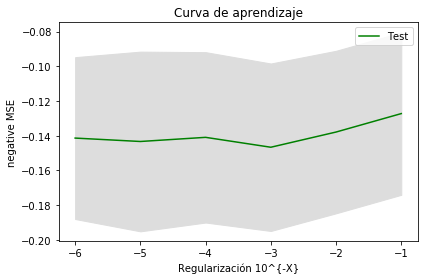

In [27]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(cv_scores_mean)-np.array(cv_scores_std)
upper_limit=np.array(cv_scores_mean)+np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import cross_val_predict


regul_param=10**-2

mlp=MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=333)
    

predicts_scaled = cross_val_predict(mlp, paises_scaled, gdp_scaled.ravel(), cv=5)


# escalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)



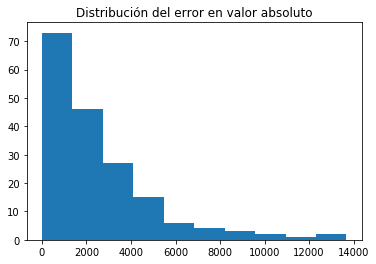

In [27]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(Y - predicts))  # np.abs(GDP - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto')
plt.show()

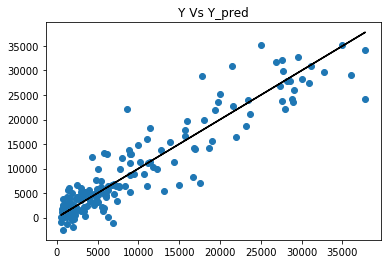

In [28]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(Y, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(Y, Y, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

In [29]:
import numpy as np
import pandas as pd

# Creación a partir de un diccionario
valores = {'Nombres': dfaux['Country'],
        'Y': Y,
        'Y_predict': predicts}

# Si no se especifican las columnas se usan todas
df1 = pd.DataFrame(valores, columns=['Nombres','Y', 'Y_predict'])
df1['Error%'] = abs(((df1['Y_predict']*100) /  df1['Y'])-100)



In [30]:
df1.sort_values(by='Error%').tail(10)

,Nombres,Y,Y_predict,Error%
125,Malawi,600.0,1822.679067,203.779845
178,Sao Tome & Principe,1200.0,-1301.608280,208.467357
45,Congo. Dem. Rep.,700.0,2188.508716,212.644102
109,Korea. North,1300.0,4137.996580,218.307429
224,Yemen,800.0,2551.274446,218.909306
188,Somalia,500.0,-959.012723,291.802545
37,Cape Verde,1400.0,5559.961491,297.140106
97,Iraq,1500.0,6104.616282,306.974419
151,Niger,800.0,-2518.557919,414.819740
0,Afghanistan,700.0,3730.450569,432.921510


In [31]:
df1.sort_values(by='Error%').head(10)

,Nombres,Y,Y_predict,Error%
133,Mauritius,11400.0,11402.635914,0.023122
8,Argentina,11200.0,11215.098300,0.134806
38,Cayman Islands,35000.0,35109.848755,0.313854
206,Turkey,6700.0,6659.072715,0.610855
54,Denmark,31100.0,30876.349216,0.719134
96,Iran,7000.0,6939.700312,0.861424
43,Colombia,6300.0,6359.060204,0.937464
56,Dominica,5400.0,5452.004169,0.963040
103,Japan,28200.0,27823.681379,1.334463
68,Finland,27400.0,26850.366650,2.005961


In [32]:
(df1['Error%'] < 20.0).value_counts()

False    110
True      69
Name: Error%, dtype: int64

In [33]:
(df1['Error%'] > 100.0).value_counts()

False    151
True      28
Name: Error%, dtype: int64

In [34]:
dfNeg2 # Mayor error cometido subestimando el GDP

,Country,Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Service
151,Niger,9.9,-0.67,121.69,800.0,17.6,1.9,0.01,1.0,50.73,20.91,0.390,0.440
178,Sao Tome & Principe,193.2,-2.72,43.11,1200.0,79.3,36.2,48.96,2.0,40.25,6.47,0.167,0.684
188,Somalia,13.9,5.37,116.70,500.0,37.8,11.3,0.04,1.0,45.13,16.63,0.650,0.250
136,Micronesia. Fed. St.,153.9,-20.99,30.21,2000.0,89.0,114.8,45.71,2.0,24.68,4.75,0.289,0.559


In [35]:
dfPos2 # Mayor error cometido sobreestimando el GDP

,Country,Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Service
0,Afghanistan,48.0,23.06,163.07,700.0,36.0,3.2,0.22,1.0,46.60,20.34,0.380,0.380
105,Jordan,64.0,6.59,17.35,4300.0,91.3,104.5,1.83,1.0,21.25,2.65,0.033,0.680
37,Cape Verde,104.4,-12.07,47.77,1400.0,76.6,169.6,0.50,3.0,24.87,6.55,0.121,0.660
97,Iraq,61.3,0.00,50.25,1500.0,40.4,38.6,0.78,1.0,31.98,5.37,0.073,0.261
109,Korea. North,191.8,0.00,24.04,1300.0,99.0,42.4,2.49,3.0,15.54,7.13,0.300,0.360


#### Conclusiones MLP2
En general se cometen errores más graves en los valores que sobreestiman el GDP. En MLP1 había 22 valores que superaban el 100% del error cometido y ahora tenemos 28. En cambio en errores menores del 20% tenemos el mismo número. Comparado con MLP1 se cometen más errores y más costosos. Excepto para los valores que tienen un error entre 4000 y 9000. Aquí MLP2 comete errores más cercanos a 4000, en cambio MLP1 tiene muchos valores con un error entre 5000 y 9000.

Los países que más han cambiado han sido:

Afghanistan. MLP1: -9128, MLP2: 3730, Real: 700

Tajikistan. MLP1: -852, MLP2: 1815, Real: 1000

Korea North. MLP1: 300, MLP2: 4137, Real: 1300

Iraq. MLP1: 4653, MLP2: 6104, Real: 1500

Como podemos observar en general las predicciones de MLP2 son valores más altos. Podemos suponer que al tener una mayor abstracción sobre las variables en MLP2 por tener 2 capas ocultas, las variables que antes cogían mucho peso al encontrarse en cerca de los extremos ahora ya no tienen tanto peso. Esto no nos ha ayudado a hacer una predicción mejor pero ha evitado cometer un error gravísimo en 1 país.